# Current induced domain wall motion

In this tutorial we show how spin transfer torque (STT) can be included in micromagnetic simulations. To illustrate that, we will try to move the domain wall using spin-polarised current.

Let us simulate a two-dimensional sample with length $L = 500 \,\text{nm}$, width $w = 20 \,\text{nm}$ and discretisation cell $(2.5 \,\text{nm}, 2.5 \,\text{nm}, 2.5 \,\text{nm})$. The material parameters are:

- exchange energy constant $A = 15 \,\text{pJ}\,\text{m}^{-1}$,
- Dzyaloshinskii-Moriya energy constant $D = 3 \,\text{mJ}\,\text{m}^{-2}$,
- uniaxial anisotropy constant $K = 0.5 \,\text{MJ}\,\text{m}^{-3}$ with easy axis $\hat{\mathbf{u}}$ in the out of plane direction $(0, 0, 1)$,
- gyrotropic ratio $\gamma = 2.211 \times 10^{5} \,\text{m}\,\text{A}^{-1}\,\text{s}^{-1}$, and
- Gilbert damping $\alpha=0.3$.

In [1]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline

L = 500e-9  # sample length (m)
w = 20e-9  # sample width (m)
d = 2.5e-9  # discretisation cell size (m)
Ms = 5.8e5  # saturation magnetisation (A/m)
A = 15e-12  # exchange energy constant (J/)
D = 3e-3  # Dzyaloshinkii-Moriya energy constant (J/m**2)
K = 0.5e6  # uniaxial anisotropy constant (J/m**3)
u = (0, 0, 1)  # easy axis
gamma = 2.211e5  # gyromagnetic ratio (m/As)
alpha = 0.3  # Gilbert damping

p1 = (0, 0, 0)
p2 = (L, w, d)
cell = (d, d, d)
mesh = oc.Mesh(p1=p1, p2=p2, cell=cell)

system = oc.System(name="domain_wall_pair")
system.hamiltonian = oc.Exchange(A=A) + oc.DMI(D=D, kind="interfacial") + oc.UniaxialAnisotropy(K=K, u=u)
system.dynamics = oc.Precession(gamma=gamma) + oc.Damping(alpha=alpha)

Because we want to move a DW pair, we need to initialise the magnetisation in an appropriate way before we relax the system.

In [2]:
def m_value(pos):
    x, y, z = pos
    if 20e-9 < x < 40e-9:
        return (0, 0, -1)
    else:
        return (0, 0, 1)
    
system.m = df.Field(mesh, value=m_value, norm=Ms)

Now, we can relax the magnetisation.

2017/3/30 13:43: Calling OOMMF (domain_wall_pair/domain_wall_pair.mif) ... [5.1s]


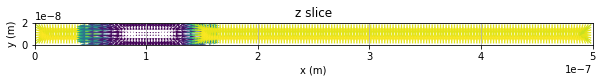

In [3]:
md = oc.MinDriver()
md.drive(system)

system.m.plot_slice("z", 0);

Now we can add the STT term to the dynamics equation.

2017/3/30 13:44: Calling OOMMF (domain_wall_pair/domain_wall_pair.mif) ... [2.7s]


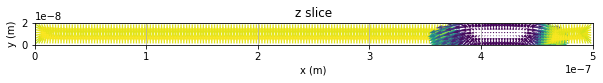

In [4]:
ux = 400  # velocity in x direction (m/s)
beta = 0.5  # non-adiabatic STT parameter

system.dynamics += oc.STT(u=(ux, 0, 0), beta=beta)

td = oc.TimeDriver()
td.drive(system, t=0.5e-9, n=1)

system.m.plot_slice("z", 0);

We see that the DW pair has moved to the positive $x$ direction.

## Exercise

Using the previous example, create one domain wall instead of a DW pair and move it using the same current.

## Solution

2017/3/30 13:44: Calling OOMMF (domain_wall_pair/domain_wall_pair.mif) ... [2.7s]
2017/3/30 13:44: Calling OOMMF (domain_wall_pair/domain_wall_pair.mif) ... [2.9s]


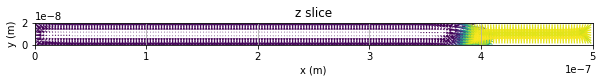

In [5]:
system = oc.System(name="domain_wall_pair")
system.hamiltonian = oc.Exchange(A=A) + oc.DMI(D=D, kind="interfacial") + oc.UniaxialAnisotropy(K=K, u=u)
system.dynamics = oc.Precession(gamma=gamma) + oc.Damping(alpha=alpha)

def m_value(pos):
    x, y, z = pos
    if x < 40e-9:
        return (0, 0, -1)
    else:
        return (0, 0, 1)
    
system.m = df.Field(mesh, value=m_value, norm=Ms)

md = oc.MinDriver()
md.drive(system)

ux = 400  # velocity in x direction (m/s)
beta = 0.5  # non-adiabatic STT parameter

system.dynamics += oc.STT(u=(ux, 0, 0), beta=beta)

td = oc.TimeDriver()
td.drive(system, t=0.5e-9, n=1)

system.m.plot_slice("z", 0);